In [1]:
import pandas as pd
import numpy as np
import scipy as scp
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Data Set-up
 - Cleaning
 - Normalizing
 - Saving variables

In [2]:
#Initialize dataframe from excel spreadsheet
oad = pd.read_excel("oxy_avail_dataset.xls")
oad.head()

,OTUId,45A 10,45B 10,45C 10,75A 10,75B 10,75C 10,150A 10,150B 10,150C 10,...,class_confidence,order_,order_confidence,family,family_confidence,genus,genus_confidence,species,species_confidence,sequence
0,OTU_1,24014,12430,477,231,35910,9801,6183,22212,5628,...,1.0,Methylophilales,1.0,Methylophilaceae,1.0,Methylophilus,1.00,NaN,NaN,ATTGAACGCTGGCGGAATGCTTTACACATGCAAGTCGAACGATGAA...
1,OTU_2,20188,24781,13429,22430,22253,24440,684,688,622,...,1.0,Methylococcales,1.0,Methylococcaceae,1.0,Methylobacter,1.00,NaN,NaN,ATTGAACGCTGGCGGTATGCTTAACACATGCAAGTCGAACGGTAGC...
2,OTU_3,2417,5259,29605,790,591,8685,1698,318,105,...,1.0,Methylophilales,1.0,Methylophilaceae,1.0,Methylotenera,1.00,NaN,NaN,ATTGAACGCTGGCGGAATGCTTTACACATGCAAGTCGAACGATGAT...
3,OTU_5,289,363,208,259,366,331,18787,10820,5755,...,1.0,Methylococcales,1.0,Methylococcaceae,1.0,Methylosarcina,1.00,NaN,NaN,ATTGAACGCTGGCGGTATGCTTAACACATGCAAGTCGAACGGTAAC...
4,OTU_4,98,98,5834,856,361,192,72,199,72,...,1.0,Methylophilales,1.0,Methylophilaceae,1.0,Methylotenera,0.95,NaN,NaN,ATTGAACGCTGGCGGAATGCTTTACACATGCAAGTCGAACGGCAGC...


In [3]:
#Drop rows that describe the index and set the index
oad_cleaned = oad.loc[:, :'225C 16'].set_index('OTUId')
oad_cleaned.head()

,45A 10,45B 10,45C 10,75A 10,75B 10,75C 10,150A 10,150B 10,150C 10,15A 10,...,75C 16,150A 16,150B 16,150C 16,15A 16,15B 16,15C 16,225A 16,225B 16,225C 16
OTUId,,,,,,,,,,,,,,,,,,,,,
OTU_1,24014,12430,477,231,35910,9801,6183,22212,5628,239,...,5380,4219,7319,16424,187,198,407,10191,10663,3043
OTU_2,20188,24781,13429,22430,22253,24440,684,688,622,12923,...,5242,380,462,1213,5432,6266,8964,1274,660,212
OTU_3,2417,5259,29605,790,591,8685,1698,318,105,785,...,9096,1619,396,545,5873,3991,423,689,326,70
OTU_5,289,363,208,259,366,331,18787,10820,5755,176,...,90,2536,1912,74,67,83,88,2604,4620,2865
OTU_4,98,98,5834,856,361,192,72,199,72,17345,...,254,34,119,103,1671,4136,2690,47,0,9


In [4]:
#Make list of indecies and column headers
index = list(oad_cleaned.index.values)
columns = list(oad_cleaned)

In [5]:
#Normalize cleaned data
# use this one: standard scalar - 0 value of the vector = 0, and the unit variance - will be between -0.5-0.5
# also make labels as species/samples not PC1 
scaler = preprocessing.StandardScaler()
scaler_df = scaler.fit_transform(oad_cleaned)
oad_norm = pd.DataFrame(scaler_df, index=index, columns=columns)
#oad_norm.columns = columns
oad_norm

C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,45A 10,45B 10,45C 10,75A 10,75B 10,75C 10,150A 10,150B 10,150C 10,15A 10,...,75C 16,150A 16,150B 16,150C 16,15A 16,15B 16,15C 16,225A 16,225B 16,225C 16
OTU_1,12.094017,6.934438,0.120995,0.048391,13.477260,5.538181,4.816835,13.985559,5.727171,0.068125,...,7.180294,12.660791,14.678848,15.655486,0.242522,0.243085,0.601609,14.080376,13.899250,11.492981
OTU_2,10.151444,13.926096,6.364506,14.474022,8.315568,13.971257,0.442069,0.325602,0.505285,9.361409,...,6.993217,1.017407,0.820770,1.075109,10.320904,11.555838,15.159325,1.660153,0.758478,0.706077
OTU_3,1.128582,2.875075,14.162147,0.411647,0.128369,4.895288,1.248763,0.090786,-0.034011,0.468167,...,12.217798,4.775196,0.687384,0.434803,11.168295,7.314488,0.628829,0.845324,0.319708,0.165017
OTU_5,0.048134,0.103546,-0.008677,0.066586,0.043330,0.082806,14.844031,6.755758,5.859648,0.021966,...,0.009034,7.556385,3.751238,-0.016670,0.011939,0.028687,0.058905,3.512670,5.960663,10.814751
OTU_4,-0.048842,-0.046466,2.703336,0.454536,0.041440,0.002732,-0.044812,0.015264,-0.068434,12.601309,...,0.231357,-0.031984,0.127563,0.011127,3.094060,7.584816,4.485595,-0.048899,-0.108553,-0.067410
OTU_239,-0.068136,-0.057221,-0.087251,-0.068579,-0.068544,-0.066396,2.156493,1.778289,-0.027752,-0.077678,...,-0.079082,1.147823,0.260950,-0.068432,-0.101431,-0.049615,-0.046573,5.918157,4.537944,-0.036928
OTU_10,0.311646,-0.060052,0.440594,0.295327,0.183550,0.044209,-0.096523,0.093324,2.271296,0.771495,...,-0.061459,-0.077477,-0.078580,1.784429,0.327069,0.640187,-0.005743,-0.086507,-0.108553,-0.090272
OTU_8,-0.071690,-0.096847,-0.083877,-0.096522,0.234196,-0.099808,-0.086977,-0.041854,8.014745,-0.101124,...,-0.100772,-0.116905,2.950917,0.611174,-0.103352,-0.116731,-0.084001,-0.106007,-0.108553,-0.097893
OTU_7,-0.087938,-0.096847,-0.100748,-0.085475,-0.084796,-0.095775,-0.085386,-0.100240,10.526591,-0.100391,...,-0.112972,-0.135103,-0.112937,-0.087602,-0.116803,-0.126052,-0.090806,-0.114364,-0.108553,-0.101703
OTU_6,-0.090984,-0.096847,-0.104605,6.173712,-0.087819,-0.103840,-0.092546,-0.100875,-0.129978,-0.098193,...,-0.110261,-0.135103,-0.112937,-0.087602,-0.116803,-0.126052,-0.090806,-0.114364,-0.108553,-0.101703


In [6]:
oad_norm.var()

45A 10     1.003968
45B 10     1.003968
45C 10     1.003968
75A 10     1.003968
75B 10     1.003968
75C 10     1.003968
150A 10    1.003968
150B 10    1.003968
150C 10    1.003968
15A 10     1.003968
15B 10     1.003968
15C 10     1.003968
225A 10    1.003968
225B 10    1.003968
225C 10    1.003968
45A 16     1.003968
45B 16     1.003968
45C 16     1.003968
75A 16     1.003968
75B 16     1.003968
75C 16     1.003968
150A 16    1.003968
150B 16    1.003968
150C 16    1.003968
15A 16     1.003968
15B 16     1.003968
15C 16     1.003968
225A 16    1.003968
225B 16    1.003968
225C 16    1.003968
dtype: float64

In [9]:
oad_cleaned_t = oad_cleaned.T
oad_cleaned_t

OTUId,OTU_1,OTU_2,OTU_3,OTU_5,OTU_4,OTU_239,OTU_10,OTU_8,OTU_7,OTU_6,...,OTU_43,OTU_47,OTU_48,OTU_52,OTU_56,OTU_58,OTU_73,OTU_88,OTU_89,OTU_97
45A 10,24014,20188,2417,289,98,60,808,53,21,15,...,0,0,0,0,0,0,0,0,0,0
45B 10,12430,24781,5259,363,98,79,74,9,9,9,...,0,0,0,0,0,0,0,0,0,0
45C 10,477,13429,29605,208,5834,45,1140,52,17,9,...,0,0,0,0,0,0,0,0,0,0
75A 10,231,22430,790,259,856,51,611,8,25,9657,...,0,0,0,0,0,0,0,0,0,0
75B 10,35910,22253,591,366,361,70,737,871,27,19,...,0,0,0,0,0,0,0,0,0,0
75C 10,9801,24440,8685,331,192,72,264,14,21,7,...,0,0,0,0,0,0,0,0,0,0
150A 10,6183,684,1698,18787,72,2839,7,19,21,12,...,0,0,0,0,0,0,0,0,0,0
150B 10,22212,688,318,10820,199,2977,322,109,17,16,...,0,0,0,0,0,0,0,0,0,0
150C 10,5628,622,105,5755,72,111,2315,7821,10229,13,...,0,0,0,0,0,0,0,0,0,0
15A 10,239,12923,785,176,17345,40,1199,8,9,12,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Normalize cleaned data
# use this one: standard scalar - 0 value of the vector = 0, and the unit variance - will be between -0.5-0.5
# also make labels as species/samples not PC1 
scaler2 = preprocessing.StandardScaler()
scaler_df2 = scaler2.fit_transform(oad_cleaned_t)
oad_norm_t = pd.DataFrame(scaler_df2, index=columns, columns=index)
#oad_norm.columns = columns
oad_norm_t

C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,OTU_1,OTU_2,OTU_3,OTU_5,OTU_4,OTU_239,OTU_10,OTU_8,OTU_7,OTU_6,...,OTU_43,OTU_47,OTU_48,OTU_52,OTU_56,OTU_58,OTU_73,OTU_88,OTU_89,OTU_97
45A 10,1.336772,1.346574,-0.217209,-0.540578,-0.363594,-0.341237,0.714353,-0.230761,-0.179170,-0.180439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45B 10,0.251132,1.876547,0.263735,-0.524346,-0.363594,-0.334236,-0.566909,-0.261761,-0.185712,-0.183903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45C 10,-0.869089,0.566671,4.383748,-0.558345,0.735408,-0.346765,1.293888,-0.231466,-0.181351,-0.183903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75A 10,-0.892144,1.605272,-0.492542,-0.547159,-0.218363,-0.344554,0.370472,-0.262466,-0.176990,5.385130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75B 10,2.451651,1.584848,-0.526219,-0.523688,-0.313204,-0.337552,0.590416,0.345555,-0.175900,-0.178131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75C 10,0.004745,1.837200,0.843509,-0.531365,-0.345584,-0.336815,-0.235247,-0.258239,-0.179170,-0.185057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150A 10,-0.334330,-0.903940,-0.338884,3.516938,-0.368576,0.682843,-0.683863,-0.254716,-0.179170,-0.182171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150B 10,1.167890,-0.903479,-0.572418,1.769385,-0.344243,0.733697,-0.134003,-0.191307,-0.181351,-0.179862,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150C 10,-0.386344,-0.911094,-0.608463,0.658383,-0.368576,-0.322443,3.344954,5.242132,5.385089,-0.181594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15A 10,-0.891394,0.508285,-0.493388,-0.565365,2.940883,-0.348607,1.396878,-0.262466,-0.185712,-0.182171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PCA of Normalized, Transposed data

In [21]:
#Make PCA object
pca_norm_t = PCA()

#Fit and scale PCA data
pca_norm_t.fit(oad_norm_t)
pca_data_norm_t = pca_norm_t.transform(oad_norm_t)

#Generate values for scree plot (variance explained) and save to csv file
var_exp_norm_t = np.round(pca_norm_t.explained_variance_ratio_*100, decimals=2)
var_exp_norm_t.tofile('Explained_Variance_of_Overall.csv')

#Create scree list and append
scree_list_norm_t = []
scree_list_norm_t.append(var_exp_norm_t)

#Label columns
col_labels_norm_t = ['PC' + str(x) for x in range(1, len(var_exp_norm_t) + 1)]

#Generate new dataframe of PCA principal components and save to csv file
pca_df_norm_t = pd.DataFrame(pca_data_norm_t, columns = col_labels_norm_t)
pca_df_norm_t.to_csv('PCA1_of_Overall_Data')
pca_df_norm_t.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-0.808299,1.938540,-1.233837,-0.205984,0.033798,-1.602444,-0.999947,0.590006,-0.128408,0.275818,...,0.102141,0.745003,1.539816,4.801474,0.781967,4.579299,-1.714199,-0.395585,0.019720,7.328795e-16
1,-0.913440,2.868445,-1.790011,-0.144966,-3.557698,-5.002115,-1.384780,-4.632824,-3.794037,-2.337292,...,1.709791,1.505522,-1.253058,-0.727790,0.154231,0.141394,-0.706220,0.154499,-0.050269,-4.427665e-17
2,-0.569659,8.093715,0.339999,0.121805,2.714972,0.708996,-1.663712,-2.150552,6.075192,-1.382740,...,0.940152,-1.305957,-0.380447,-1.286066,-0.373400,0.054122,0.291932,0.248198,-0.066662,6.773683e-16
3,-0.928268,2.635472,-0.807854,0.077326,-0.897552,-0.493131,-0.593722,-2.008704,-0.812763,-0.860355,...,5.592797,-4.206947,0.316185,0.265614,-1.013725,-0.415760,0.101077,-0.248283,-0.044322,-3.773436e-16
4,-2.672871,0.789116,-2.966097,-0.478089,-2.209914,-2.507755,-0.752220,-1.060941,-3.502605,-2.167927,...,-2.895772,-0.599377,-0.206376,-0.845531,0.000779,-0.520786,0.030987,-0.213394,-0.038681,3.998126e-16


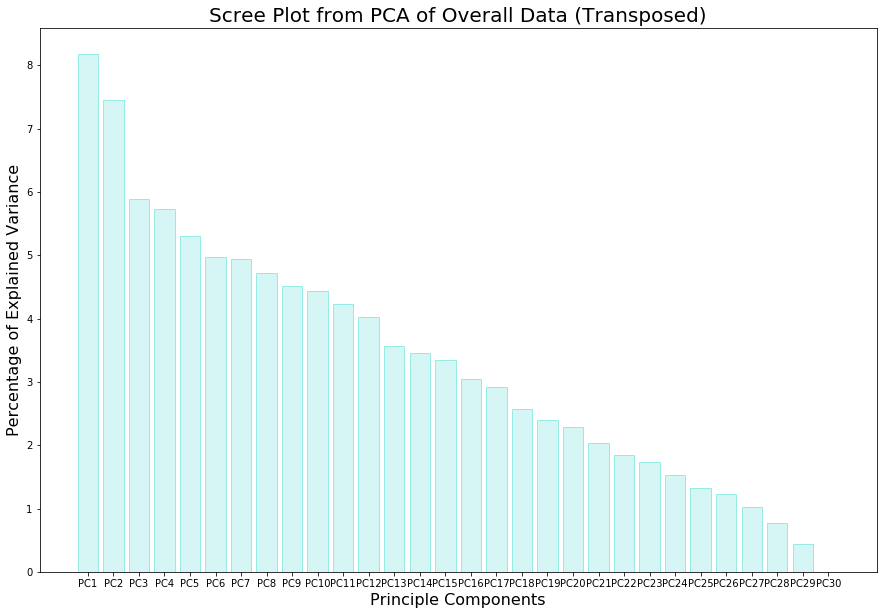

In [18]:
#Make Scree Plot of transposed data - norm data
#Initialize figure
fig = plt.figure(figsize=(15,10))

#Plot histogram
plt.bar(x = range(1, len(var_exp_norm_t) + 1), height = var_exp_norm_t, tick_label = col_labels_norm_t, color = 'paleturquoise', edgecolor = 'turquoise', alpha=0.5)

#Titles and lables
plt.ylabel('Percentage of Explained Variance', fontsize=16)
plt.xlabel('Principle Components', fontsize=16)
plt.title("Scree Plot from PCA of Overall Data", fontsize=20)

plt.show()

In [20]:
#Determine loading scores for normalized data
# Calculate Loading Scores of PC1
ls_norm_t = pd.DataFrame(np.abs(pca_norm_t.components_[0]), index = index, columns = ['Loading Score'])
# Sort the loading scores based on their magnitude
sorted_ls_norm_t = ls_norm_t.abs().sort_values(by = ['Loading Score'], ascending = False)
sorted_ls_norm_t

,Loading Score
OTU_46,0.226010
OTU_145,0.208004
OTU_29,0.194245
OTU_76,0.183998
OTU_49,0.179547
OTU_94,0.173489
OTU_61,0.173213
OTU_70,0.168763
OTU_54,0.164549
OTU_64,0.164439


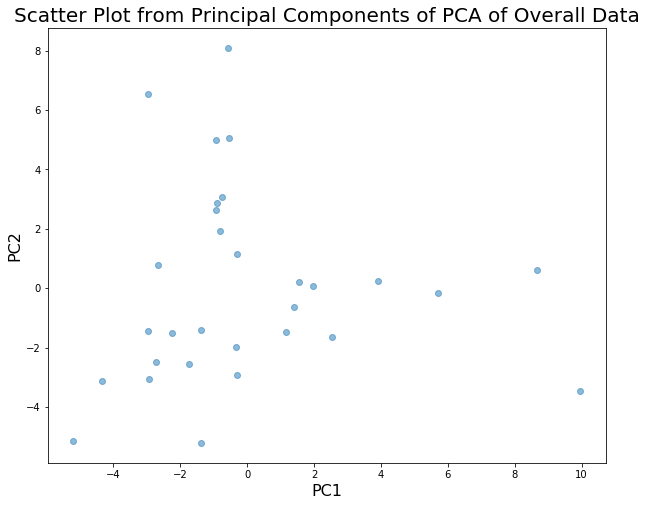

In [23]:
#Make scatter Plot of non-transposed data
#Initialize figure
fig2 = plt.figure(figsize=(10,8))

#Plot histogram
plt.scatter(x = pca_df_norm_t['PC1'], y = pca_df_norm_t['PC2'], alpha=0.5)

#Titles and lables
plt.ylabel('PC2', fontsize=16)
plt.xlabel('PC1', fontsize=16)
plt.title("Scatter Plot from Principal Components of PCA of Overall Data", fontsize=20)

plt.show()

## PCA of Normalized data (untransposed)
 - PCA
 - Loading Scores
 - Scree plot scores
 - Scree plot
 - Scatter plot (of first two PCs)

In [14]:
# #Run PCA with data transposed using oad_norm
# #Center and scale data
# oad_scaledforpca_norm = preprocessing.scale(oad_norm.T)

# #Make PCA object
# pca_norm = PCA()

# #Fit and scale PCA data
# pca_norm.fit(oad_scaledforpca_norm)
# pca_data_norm = pca_norm.transform(oad_scaledforpca_norm)

# #Generate values for scree plot (variance explained) and save to csv file
# var_exp_norm = np.round(pca.explained_variance_ratio_*100, decimals=2)
# var_exp_norm.tofile('Explained_Variance_of_Overall.csv')

# #Create scree list and append
# scree_list_norm = []
# scree_list_norm.append(var_exp)

# #Label columns
# col_labels_norm = ['PC' + str(x) for x in range(1, len(var_exp_norm) + 1)]

# #Generate new dataframe of PCA principal components and save to csv file
# pca_df_norm = pd.DataFrame(pca_data_norm, columns = col_labels_norm)
# pca_df_norm.to_csv('PCA1_of_Overall_Data')
# pca_df_norm.head()

#Run PCA with data transposed using oad_norm
#Center and scale data
#oad_scaledforpca_norm = preprocessing.scale(oad_norm.T)

#Make PCA object
pca_norm = PCA()

#Fit and scale PCA data
pca_norm.fit(oad_norm)
pca_data_norm = pca_norm.transform(oad_norm)

#Generate values for scree plot (variance explained) and save to csv file
var_exp_norm = np.round(pca_norm.explained_variance_ratio_*100, decimals=2)
var_exp_norm.tofile('Explained_Variance_of_Overall.csv')

#Create scree list and append
scree_list_norm = []
scree_list_norm.append(var_exp_norm)

#Label columns
col_labels_norm = ['PC' + str(x) for x in range(1, len(var_exp_norm) + 1)]

#Generate new dataframe of PCA principal components and save to csv file
pca_df_norm = pd.DataFrame(pca_data_norm, columns = col_labels_norm)
pca_df_norm.to_csv('PCA1_of_Overall_Data')
pca_df_norm.head()


In [15]:
#Convert from a np.array to df
scree_norm = np.array(scree_list_norm)
scree_norm = pd.DataFrame(scree_norm)
scree_norm

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,51.46,26.76,8.68,5.0,3.49,2.32,1.24,0.45,0.21,0.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Determine loading scores for normalized data
# Calculate Loading Scores of PC1
ls_norm = pd.DataFrame(np.abs(pca_norm.components_[0]), index = columns, columns = ['Loading Score'])
# Sort the loading scores based on their magnitude
sorted_ls_norm = ls_norm.abs().sort_values(by = ['Loading Score'], ascending = False)
sorted_ls_norm

,Loading Score
45A 10,0.241248
75B 10,0.236505
75B 16,0.235797
45A 16,0.234882
45B 10,0.222904
75C 10,0.215739
150A 16,0.207881
225A 16,0.205075
75C 16,0.204033
225C 10,0.202732


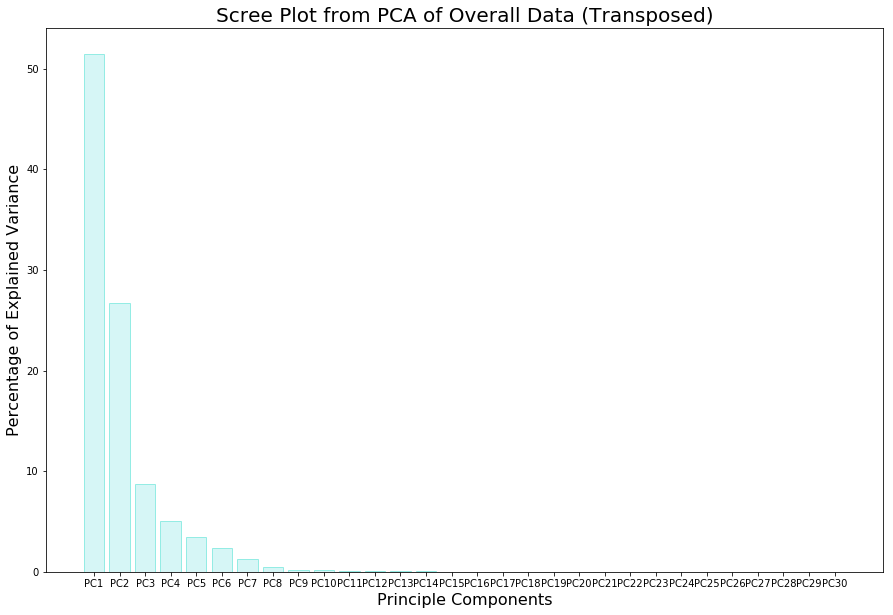

In [17]:
#Make Scree Plot of transposed data - norm data
#Initialize figure
fig = plt.figure(figsize=(15,10))

#Plot histogram
plt.bar(x = range(1, len(var_exp_norm) + 1), height = var_exp_norm, tick_label = col_labels_norm, color = 'paleturquoise', edgecolor = 'turquoise', alpha=0.5)

#Titles and lables
plt.ylabel('Percentage of Explained Variance', fontsize=16)
plt.xlabel('Principle Components', fontsize=16)
plt.title("Scree Plot from PCA of Overall Data (Transposed)", fontsize=20)

plt.show()

## PCA of Cleaned data (un-normalized, transposed)
 - PCA
 - Loading Scores
 - Scree plot scores
 - Scree plot
 - Scatter plot (of first two PCs)

In [ ]:
#Run PCA with data transposed using oad_cleaned
#Center and scale data
oad_scaledforpca = preprocessing.scale(oad_cleaned.T)

#Make PCA object
pca = PCA()

#Fit and scale PCA data
pca.fit(oad_scaledforpca)
pca_data = pca.transform(oad_scaledforpca)

#Generate values for scree plot (variance explained) and save to csv file
var_exp = np.round(pca.explained_variance_ratio_*100, decimals=2)
var_exp.tofile('Explained_Variance_of_Overall.csv')

#Create scree list and append
scree_list = []
scree_list.append(var_exp)

#Label columns
col_labels = ['PC' + str(x) for x in range(1, len(var_exp) + 1)]

#Generate new dataframe of PCA principal components and save to csv file
pca_df = pd.DataFrame(pca_data, columns = col_labels)
pca_df.to_csv('PCA1_of_Overall_Data')
pca_df.head()


In [ ]:
#Convert from a np.array to df
scree = np.array(scree_list)
scree = pd.DataFrame(scree)
scree

In [ ]:
#Determine loading scores for oad_cleaned (transposed)
# Calculate Loading Scores of PC1
loading_scores = pd.DataFrame(np.abs(pca.components_[0]), index = index, columns = ['Loading Score'])
# Sort the loading scores based on their magnitude
sorted_ls = loading_scores.abs().sort_values(by = ['Loading Score'], ascending = False)
sorted_ls

In [ ]:
#Make Scree Plot of transposed data - cleaned data
#Initialize figure
fig = plt.figure(figsize=(15,10))

#Plot histogram
plt.bar(x = range(1, len(var_exp) + 1), height = var_exp, tick_label = col_labels, color = 'thistle', edgecolor = 'rebeccapurple', alpha=0.5)

#Titles and lables
plt.ylabel('Percentage of Explained Variance', fontsize=16)
plt.xlabel('Principle Components', fontsize=16)
plt.title("Scree Plot from PCA of Overall Data (Transposed)", fontsize=20)

plt.show()

In [ ]:
#Rouch plot of all loading scores
plt.bar(list(sorted_ls.index), sorted_ls['Loading Score'], color = 'purple', alpha=0.5)
plt.ylabel('Loading Scores of Each Principal Component')
plt.xlabel('Principle Components')
plt.title('Loading Scores for All Samples')
plt.show()

In [ ]:
#Rough plot of top ten PCs
plt.bar(list(sorted_ls.index)[0:10],sorted_ls['Loading Score'].iloc[0:10], color = 'lightgreen', edgecolor = 'g')
plt.ylabel('Sorted Loading Scores of Principal Components')
plt.xlabel('Principle Components')
plt.title('Sorted Loading Scores for Top 10 Properties')
plt.show()

In [ ]:
#Create DF of top ten species
topten = pd.DataFrame(index=oad_cleaned.T.index,columns=list(sorted_ls.index)[190:200])
for k in list(sorted_ls.index)[190:200]:
    topten[k]=oad_cleaned.T[k]
    
topten

In [ ]:
# Make 3D Scatter Plot (of top 3 PCs) with labels of each point
fig = plt.figure()
ax = Axes3D(fig)
for i in range(len(topten)):
    x, y, z = topten.iloc[i]['OTU_63'], topten.iloc[i]['OTU_175'], topten.iloc[i]['OTU_156']
    ax.scatter(x, y, z, color = 'm')
    ax.text(x, y, z, '{0}'.format(topten.index[i]), size = 8, color = 'b')
ax.set_title('PCA Scatter Plot for Top 3 Properties')
ax.set_xlabel('OTU_63 (Top Property)')
ax.set_ylabel('OTU_175 (2nd Property)')
ax.set_zlabel('OTU_156 (3rd Property)')

## PCA of Cleaned data (unnormalized, untransposed)
 - PCA
 - Loading Scores
 - Scree plot scores
 - Scree plot
 - Scatter plot (of first two PCs)
 
 NOTE: Same output normalized, transposed

In [ ]:
#Run PCA with data not transposed
#Center and scale data
oad_scaledforpca2 = preprocessing.scale(oad_cleaned)

#Make PCA object
pca2 = PCA()

#Fit and scale PCA data
pca2.fit(oad_scaledforpca2)
pca_data2 = pca2.transform(oad_scaledforpca2)

#Generate values for scree plot (variance explained) and save to csv file
var_exp2 = np.round(pca2.explained_variance_ratio_*100, decimals=2)
var_exp2.tofile('Explained_Variance_of_Overall.csv')

#Create scree list and append
scree_list2 = []
scree_list2.append(var_exp2)
#print(var_exp2)

#Label columns
col_labels2 = ['PC' + str(x) for x in range(1, len(var_exp) + 1)]

#Generate new dataframe of PCA principal components and save to csv file
pca_df2 = pd.DataFrame(pca_data2, columns = col_labels2)
pca_df2.to_csv('PCA1_of_Overall_Data')
pca_df2.head()

In [ ]:
#Determine loading scores for cleaned data (untransposed)
# Calculate Loading Scores of PC1
ls2 = pd.DataFrame(np.abs(pca2.components_[0]), index = columns, columns = ['Loading Score'])
# Sort the loading scores based on their magnitude
sorted_ls2 = ls2.abs().sort_values(by = ['Loading Score'], ascending = False)
sorted_ls2

In [ ]:
#Convert from a np.array to df
scree2 = np.array(scree_list2)
scree2 = pd.DataFrame(scree2)
scree2

In [ ]:
#Make Scree Plot of non-transposed data
#Initialize figure
fig2 = plt.figure(figsize=(15,10))

#Plot histogram
plt.bar(x = range(1, len(var_exp2) + 1), height = var_exp2, tick_label = col_labels2, color = 'goldenrod', edgecolor = 'darkgoldenrod', alpha=0.5)

#Titles and lables
plt.ylabel('Percentage of Explained Variance', fontsize=16)
plt.xlabel('Principle Components', fontsize=16)
plt.title("Scree Plot from PCA of Overall Data (Un-transposed)", fontsize=20)

plt.show()

In [ ]:
#Rouch plot of all loading scores
plt.bar(list(ls2.index),ls2['Loading Score'])
plt.ylabel('Loading Scores of Each Principal Component')
plt.xlabel('Principle Components')
plt.title('Loading Scores for All Samples')
plt.show()

In [ ]:
#Rough plot of top ten loading scores
plt.bar(list(sorted_ls2.index)[0:10],sorted_ls2['Loading Score'].iloc[0:10], color = 'lavenderblush', edgecolor = 'palevioletred')
plt.ylabel('Sorted Loading Scores of Principal Components')
plt.xlabel('Principle Components')
plt.title('Sorted Loading Scores for Top 10 Samples')
plt.show()

In [ ]:
#Make scatter Plot of non-transposed data
#Initialize figure
fig2 = plt.figure(figsize=(10,8))

#Plot histogram
plt.scatter(x = pca_df2['PC1'], y = pca_df2['PC2'], alpha=0.5)

#Titles and lables
plt.ylabel('PC2', fontsize=16)
plt.xlabel('PC1', fontsize=16)
plt.title("Scatter Plot from Principal Components of PCA of Overall Data (Un-transposed)", fontsize=20)

plt.show()

In [ ]:
#Create DF of top ten samples
topten2 = pd.DataFrame(index=index,columns=list(sorted_ls2.index)[0:10])
for k in list(sorted_ls2.index)[0:10]:
    topten2[k]=oad_cleaned[k]
    
topten2

In [ ]:
# Make 3D Scatter Plot (of top 3 PCs) with labels of each point
fig = plt.figure()
ax = Axes3D(fig)
for i in range(len(topten2)):
    x, y, z = topten2.iloc[i]['45A 10'], topten2.iloc[i]['75B 10'], topten2.iloc[i]['75B 16']
    ax.scatter(x, y, z, color = 'm')
    ax.text(x, y, z, '{0}'.format(topten2.index[i]), size = 8, color = 'b')
ax.set_title('PCA Scatter Plot for Top 3 Properties')
ax.set_xlabel('45A 10 (Top Property)')
ax.set_ylabel('75A 10 (2nd Property)')
ax.set_zlabel('75A 16 (3rd Property)')